<a href="https://colab.research.google.com/github/arpit1729/ma22c007_2023_PL/blob/main/Assignments/Assignment_9/Passengers_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
pasg_count = t.shape[0] #passenger count
print("The number of passengers described in the dataset is:", pasg_count)

The number of passengers described in the dataset is: 889


In [23]:
dist_pasg_count = t['who'].nunique()
dist_pasg = t['who'].unique()
print("Number of distinct type of passenger in the 'who' column:", dist_pasg_count)
print("Distinct type of passenger in the 'who' column:", dist_pasg)

Number of distinct type of passenger in the 'who' column: 3
Distinct type of passenger in the 'who' column: ['man' 'woman' 'child']


In [22]:
missing_pasg = t.isna().sum()
print("Number of missing passenger in each data column:")
print(missing_pasg)


Number of missing passenger in each data column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [24]:
pasg_over_60 = t[t['age'] > 60]
number_of_pasg_over_60 = len(pasg_over_60)
print("Number of passengers over 60 years old:", number_of_pasg_over_60)


Number of passengers over 60 years old: 21


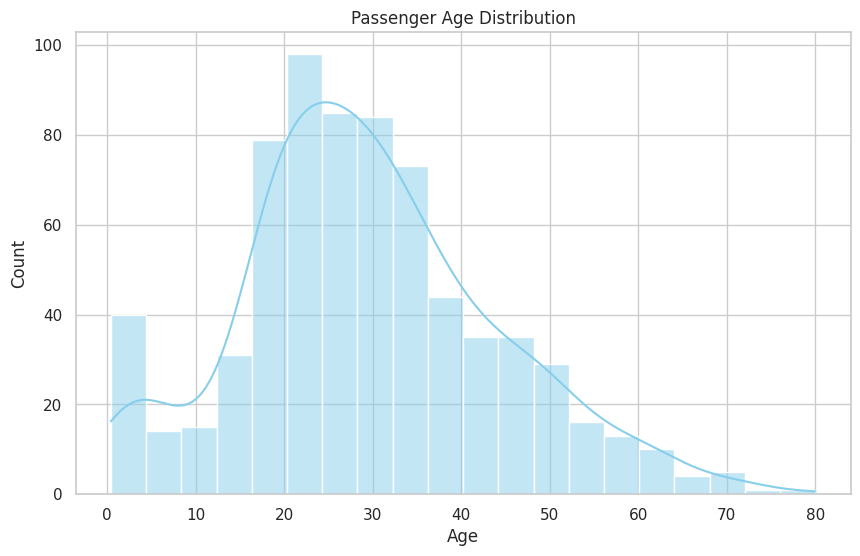

In [25]:
import matplotlib.pyplot as plt
seaborn.set(style="whitegrid")
plt.figure(figsize=(10, 6))
seaborn.histplot(data=t, x='age', kde=True, bins=20, color='skyblue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [26]:
quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print("25th percentile:", quantiles[0.25])
print("50th percentile, median:", quantiles[0.5])
print("75th percentile:", quantiles[0.75])


25th percentile: 20.0
50th percentile, median: 28.0
75th percentile: 38.0


In [27]:
t.dropna(subset=['embarked'], inplace=True)


In [28]:
avg_fare = t['fare'].mean()
min_fare = t['fare'].min()
max_fare = t['fare'].max()
print("Average Fare:", avg_fare)
print("Minimum Fare:", min_fare)
print("Maximum Fare:", max_fare)

Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [29]:
class_prop = t['class'].value_counts(normalize=True)
print("\nProportions of Passengers in Different Classes:")
print(class_prop)



Proportions of Passengers in Different Classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [30]:
gender_class_ratio = t.groupby(['class', 'sex']).size().unstack()
gender_class_ratio['Female-to-Male Ratio'] = gender_class_ratio['female'] / gender_class_ratio['male']
print("Female-to-Male Ratio in Each Travel Class:")
print(gender_class_ratio[['Female-to-Male Ratio']])


Female-to-Male Ratio in Each Travel Class:
sex     Female-to-Male Ratio
class                       
First               0.754098
Second              0.703704
Third               0.414986


In [31]:
surv_fraction = t['survived'].mean()
print("Fraction of passengers who survived:", surv_fraction)

Fraction of passengers who survived: 0.38245219347581555


In [14]:
survival_rates_by_gender = t.groupby('sex')['survived'].mean()
print("Survival rates by gender:")
print(survival_rates_by_gender)


Survival rates by gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [32]:
surv_rates_by_class = t.groupby('class')['survived'].mean()
print("Survival rates by passenger class:")
print(surv_rates_by_class)

Survival rates by passenger class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [33]:
surv_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Table of Survival Rates by Class and Gender:")
print(surv_table)

Table of Survival Rates by Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [34]:
table = t.pivot_table(index='sex', columns='class', values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})
print("Table with Number of Survivors and Average Fare by Gender and Cabin:")
print(table)


Table with Number of Survivors and Average Fare by Gender and Cabin:
              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.693750  21.970121  16.118810       89     70    72
male     67.226127  19.741782  12.661633       45     17    47
